## Importing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
# Loading the Dataset
df=pd.read_csv(r"C:\Users\ntpc\Desktop\loan.csv")

In [5]:
#Fetching First 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking Null values (if any ) of each column

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dropping the Duplicated Values (If Any)

In [7]:
df.drop_duplicates(inplace=True)

## Now we are checking the numerical and categorocal data from the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Checking Shape of the Dataset
df.shape

(614, 13)

In [10]:
#Changing the Datatype of ApplicantIncome to float type so that we can have categorical and numerical data under one roof
df['ApplicantIncome']=df['ApplicantIncome'].astype("float64")

In [11]:
# Dropping the Loan_ID column as it is not needed for our analysis
df.drop('Loan_ID', axis=1, inplace=True)

## To Find How Many Null Values are there in Categorical Data

In [12]:
df.select_dtypes(include='object').isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [13]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [14]:
#df['Dependents'] has mixed data hence we need to replace 3+ to 3
df['Dependents'].replace("3+","3",inplace=True)

## Now we will Fill NUll Values For Categorical Data with Mode

In [15]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ntpc\AppData\Local\Temp\ipykernel_6520\3448830320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Now We Will Fill Numerical Data's Null Values using mean

In [16]:
float_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include='float64').columns] = float_imputer.fit_transform(df.select_dtypes(include='float64'))

In [17]:
# Now we will check if we have any null values present
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# For our analysis we need to convert categorical data to numerical data. We will do using OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df.select_dtypes(include='object')).toarray()

In [19]:
encoded_columns = encoder.get_feature_names_out(df.select_dtypes(include='object').columns)

In [20]:
# Now we are converting the modified NumPy array back to a DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

In [21]:
# Now we are putting all the modications into our actual dataFrame
df_final = pd.concat([ df.select_dtypes(include='float64'),df_encoded, ], axis=1)

# Assuming df_final is your DataFrame
columns_to_drop = ['Gender_Female', 'Married_No', 'Education_Not Graduate','Self_Employed_No', 'Loan_Status_N']

# Drop multiple columns
df_final.drop(columns=columns_to_drop, inplace=True)

df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [22]:
df_final.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.817590,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.133550,0.291531,0.379479,0.328990,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.386497,0.476373,0.492894,0.372495,0.371027,0.276201,0.413389,0.340446,0.454838,0.485653,0.470229,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


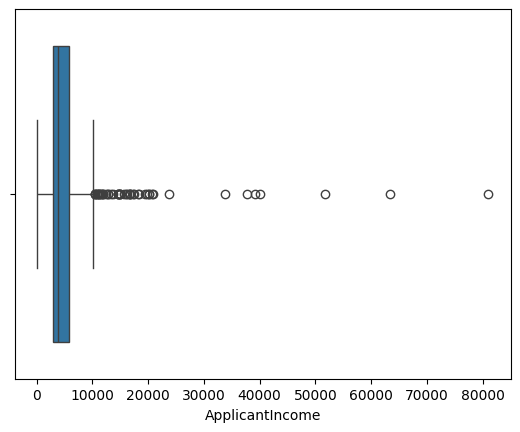

In [23]:
sns.boxplot(x='ApplicantIncome',data=df_final)
plt.show()

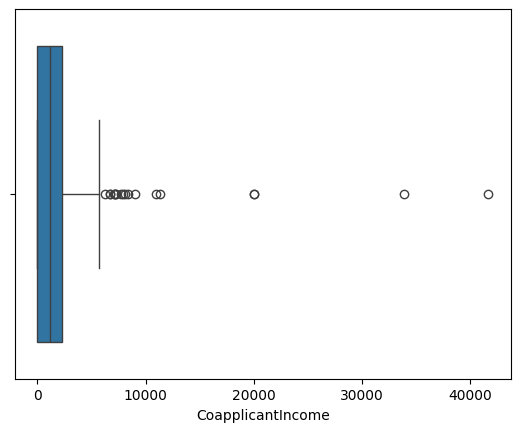

In [24]:
sns.boxplot(x='CoapplicantIncome',data=df_final)
plt.show()

## From our df_final we see there are outliers in our columns:ApplicantIncome and CoapplicantIncome

In [25]:
#Now we have to remove the outliers. We will do using IQR Method For ApplicantIncome
Q1 = df_final['ApplicantIncome'].quantile(0.25)
Q3 = df_final['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# We are defining lower and upper bounds for outliers in ApplicantIncome column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identifying rows with outliers in ApplicantIncome column
outliers_Applicant = (df_final['ApplicantIncome'] < lower_bound) | (df_final['ApplicantIncome'] > upper_bound)

In [27]:
#Now we have to remove the outliers. We will do using IQR Method For CoapplicantIncome
Q1_Coapplicant = df_final['CoapplicantIncome'].quantile(0.25)
Q3_Coapplicant = df_final['CoapplicantIncome'].quantile(0.75)
IQR_Coapplicant = Q3_Coapplicant - Q1_Coapplicant

In [28]:
# Now we are defining lower and upper bounds for outliers in CoapplicantIncome column
lower_bound_Coapplicant = Q1_Coapplicant - 1.5 * IQR_Coapplicant
upper_bound_Coapplicant = Q3_Coapplicant + 1.5 * IQR_Coapplicant
# Identifying rows with outliers in CoapplicantIncome column
outliers_Coapplicant = (df_final['CoapplicantIncome'] < lower_bound_Coapplicant) | (df_final['CoapplicantIncome'] > upper_bound_Coapplicant)

In [29]:
# Combining outlier conditions for both columns using logical OR
outliers_combined = outliers_Applicant | outliers_Coapplicant

In [30]:
# Removing rows with outliers from both ApplicantIncome and CoapplicantIncome columns
df_cleaned = df_final[~outliers_combined]

In [31]:
df_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,4128.978102,1359.425036,131.173802,342.569343,0.842881,0.815693,0.649635,0.598540,0.158759,0.166058,0.076642,0.760949,0.116788,0.299270,0.381387,0.319343,0.693431
std,1907.396960,1458.228533,51.648601,64.677492,0.348914,0.388088,0.477520,0.490642,0.365785,0.372473,0.266266,0.426894,0.321461,0.458357,0.486171,0.466648,0.461490
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2768.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3656.000000,1293.500000,125.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5000.000000,2250.000000,155.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


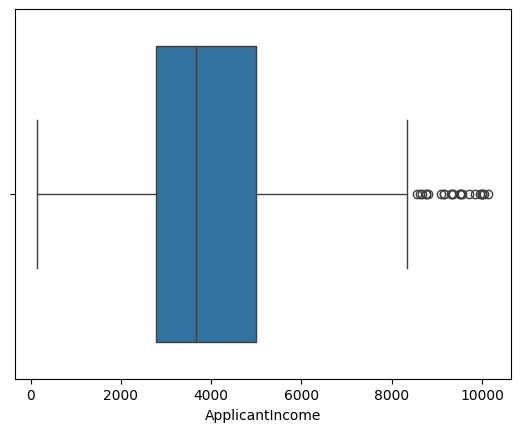

In [32]:
#Now Checking Ouliers for ApplicantIncome
sns.boxplot(x='ApplicantIncome',data=df_cleaned)
plt.show()

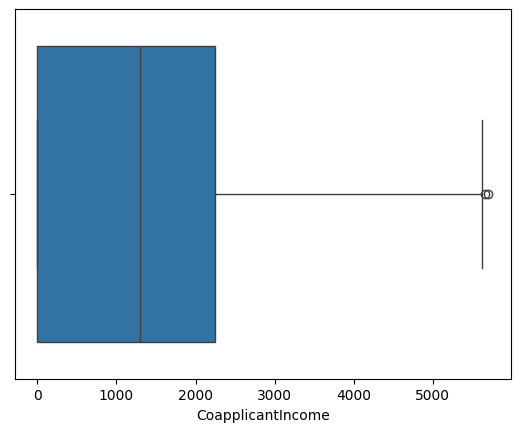

In [33]:
#Now Checking Ouliers for CoapplicantIncome
sns.boxplot(x='CoapplicantIncome',data=df_cleaned)
plt.show()

In [34]:
df_final.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3               0
Education_Graduate         0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

### Ouliers for ApplicantIncome and CoapplicantIncome has been reduced

In [35]:
#Downloading the Cleaned Data
df_cleaned.to_csv(r'C:\Users\ntpc\Desktop\Cleaned_Data.csv', index=False)

In [36]:
df_cleaned.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
